In [15]:

# Specify directories 
proj_dir = "C:/Users/singhy/Dropbox/Labor_Market_PT/replication" 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


data = pd.read_excel(f"{proj_dir}/empirical/inputs/raw_data/atl_fed/wage-growth-data.xlsx", sheet_name = 'Job Switcher', skiprows=2, header=0)

df = pd.DataFrame(data)

# Convert the date column to datetime objects
df["date"] = pd.to_datetime(df["Unnamed: 0"])

# Replace placeholder '.' values with NaN
df.replace(".", float("nan"), inplace=True)

# Convert the numeric columns to float
df["Job_Stayer"] = pd.to_numeric(df["Job Stayer"], errors="coerce")
df["Job_Switcher"] = pd.to_numeric(df["Job Switcher"], errors="coerce")

df = df.drop(columns=["Unnamed: 0"])
df['diff'] = df["Job_Switcher"] - df["Job_Stayer"] 


cpi = pd.read_csv(f"{data_dir}/CPI/CPIAUCSL.csv")

# CPI 
cpi = cpi.iloc[10:].reset_index(drop=True)

cpi = cpi.rename(columns={
                            'observation_date': 'date', 
                            'CPIAUCSL':               'P'
})

cpi['date'] = pd.to_datetime(cpi['date'])
cpi['P'] = pd.to_numeric(cpi['P'], errors='coerce')
cpi['P_12m_change'] = cpi['P'].pct_change(periods=12) * 100

C:\Users\singhy\AppData\Local\Temp\ipykernel_23156\4269803483.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(".", float("nan"), inplace=True)


In [16]:
final = df.merge(cpi, on =['date'])

final.to_csv(f"{proj_dir}/empirical/outputs/processed_data/wage_g_diff_atlFed.csv", index = False ) 

In [17]:
df = final

                            OLS Regression Results                            
Dep. Variable:                   diff   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.154
Method:                 Least Squares   F-statistic:                     60.15
Date:                Fri, 11 Jul 2025   Prob (F-statistic):           1.16e-13
Time:                        14:54:14   Log-Likelihood:                -226.10
No. Observations:                 325   AIC:                             456.2
Df Residuals:                     323   BIC:                             463.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4131      0.048      8.569   

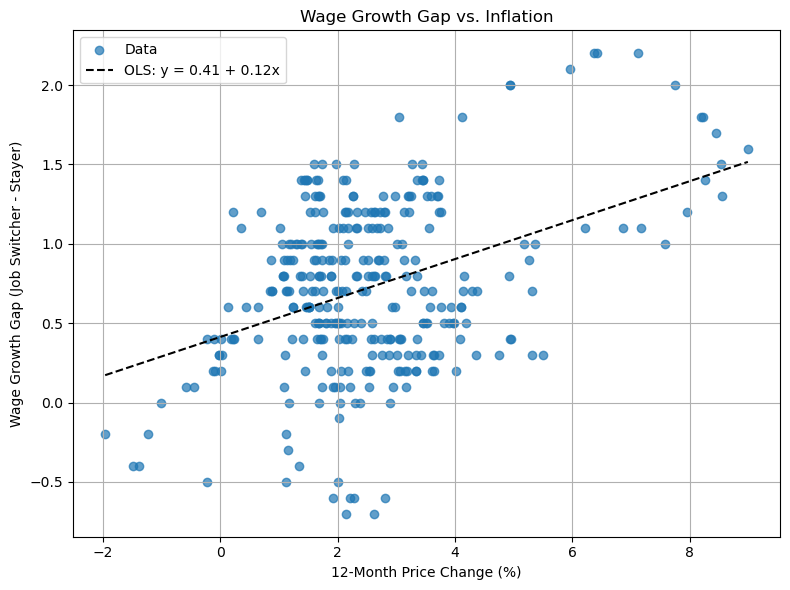

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm



# Drop missing values in required columns
plot_df = df.dropna(subset=["diff", "P_12m_change"])

# Define x and y
y = plot_df["diff"]
x = plot_df["P_12m_change"]

# Fit OLS regression
X = sm.add_constant(x)  # adds intercept term
model = sm.OLS(y, X).fit()
slope = model.params["P_12m_change"]
intercept = model.params["const"]
print(model.summary())

# Predict values for regression line
x_vals = np.linspace(x.min(), x.max(), 100)
y_vals = intercept + slope * x_vals

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.7, label="Data")
plt.plot(x_vals, y_vals, color="black", linestyle="--", label=f"OLS: y = {intercept:.2f} + {slope:.2f}x")

plt.ylabel("Wage Growth Gap (Job Switcher - Stayer)")
plt.xlabel("12-Month Price Change (%)")
plt.title("Wage Growth Gap vs. Inflation")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
